# Probabilité

## Quelques aspects techniques avant de commencer

Il est très important de faire tourner la section ci-dessous, même si d'un point de vue pratique elle ne fait que préparer les instruments dont nous allons nous servir plus tard dans le document.



In [ ]:
# Package utilisé pour faire le graphique
# install.packages("ggplot2") # installation, à faire une seule fois
library(ggplot2) # chargement

# Couleur pour le graphique
darkred <- "#8B0000"

## Définir l'espace des probabilités


Une distribution de probabilité peut être considérée comme une construction formelle qui capture l'état de croyance d'un agent face à la réalisation d'un certain événement. Plus concrètement, une distribution de probabilité attribue des valeurs numériques (typiquement entre 0 et 1) à un certain nombre d'événements différents, c'est-à-dire à différents états dans lesquels le monde pourrait être. Ces valeurs numériques peuvent être interprétées comme le poids de la croyance que l'agent attribue à chaque événement : plus le nombre attribué à un événement est élevé, plus l'agent considère cet état du monde comme probable.

Nous pouvons définir l'espace des probabilités comme un ensemble $(\Omega, F, P)$

* **$\Omega$ -- Univers**: L'univers est l'espace d'échantillonnage, il contient tous les états possibles d'une expérience aléatoire. Les éléments contenus dans l'univers sont les issues (*outcomes*) et sont typiquement notés $\omega$.  Donc, $\omega_1, \omega_2, \ldots \in \Omega$. Par exemple, si vous lancez un dé à six faces, l'univers est $\Omega = \{ 1, 2, 3, 4, 5, 6 \} $, et la première des issues possibles est $\omega_1 = 1$.
  
* **$F$ -- L'espace des événements**: L'espace des événements contient des événements $E$. Un événement est un sous-ensemble d'issues tirées de l'univers $\Omega$. Quand un événement est constitué d’un seul élément, on dit que c'est un *événement élémentaire*. Par exemple, si vous lancez un dé à six faces, vous pouvez calculer la probabilité d'obtenir un nombre pair, dans ce cas l'événement est $E = \{2,4,6\}$. Pour calculer la probabilité d'obtenir un nombre spécifique comme 6, dans ce cas l'événement élémentaire est $E = \{6\}$.


* **$P$ -- Probabilité**: La probabilité est une fonction qui assigne une valeur numérique à chaque événement : $P(E) = x$.


La probabilité suit les trois axiomes suivants (Kolmogorov, 1956) :

* $0 \leq P(E) \leq 1$ \
La probabilité est une valeur numérique non négative qui varie entre 0 et 1
  
* $P(\Omega) = 1$ \
La somme de la probabilité de toutes les issues possibles dans l'univers est égale à 1

  
* $P(E_1 \cup E_2 \cup E_3 \cup \ldots) = P(E_1) + P(E_2) + P(E_3) + \ldots$ \
Lorsque $E_1, E_2, E_3, \ldots$ sont mutuellement exclusifs, la probabilité que l'un ou l'autre se produise est égale à la somme de leurs probabilités individuelles


La probabilité peut donc être conçue comme le rapport du nombre de cas favorables à la réalisation d’un événement au nombre total de cas possibles. Dans l'exemple du dé, la probabilité d'obtenir un nombre pair correspond à $3/6 = 0.5$ tandis que la probabilité d'obtenir le nombre 6 correspond à $1/6 = 0.1667$. Chaque événement $E$ est associé à une probabilité $P(E)$ qui varie entre 0 et 1.




## La variable aléatoire

La variable aléatoire est un concept fondamental en statistique qui fait le lien entre la probabilité théorique et les données du monde réel. Dans un context de psychologie expériementale nous mesurons des données comme des mouvements oculaires ou des choix. Typiquement, on considère que ces données (notée comme $x$) sont généres par une variable aléatoire (notée comme $X$). La valeur de la variable aléatoire n'est pas directement observable ; nous n'avons accès qu'aux réalisations de cette variable à travers les données mesurées.


Formellement, la variable aléatoire $X$ est une fonction de l'espace d'échantillonnage $\Omega$ des issues possibles $\omega$ vers le système des nombres réels $\mathbb{R}$ :

$$X : \Omega \to \mathbb{R}$$

La variable aléatoire associe à chaque issue $\omega$ un nombre : $X(\omega) = x, \omega \in \Omega$. Cette valuer numerique peut être considéré comme un nombre qui capture un aspect pertinent de ce qui est en fait une réalité beaucoup plus complexe.


Ses valeurs sont déterminées par le résultat d’une expérience. Par "aléatoire", nous ne voulons pas dire totalement imprévisible. Un processus aléatoire est simplement un processus dont le résultat ne peut pas être parfaitement connu à l'avance (il peut néanmoins être assez prévisible). Ainsi, pour un lancer de dé, nous pouvons créer une variable aléatoire $X$ qui prend une valeur de 1 si le dé tombe sur 1, de 2 s'il tombe sur 2, et ansi de suite. Comme le lancer de dé ne peut produire qu'un nombre défini d'événements (dans ce cas six), $X$ est une variable aléatoire discrète.

En termes de notation, on utilise typiquement les conventions suivantes :

* la variable aléatoire est notée avec une majuscule $X$ et la valeur numérique avec une minuscule $x$,
* la probabilité que la variable aléatoire ait une certaine valeur numérique est notée $P(X = x)$ -- cela correspond à la version abrégée de la version plus précise $P(\{\omega \in \Omega : X(\omega) = x\})$,
* la probabilité que la variable aléatoire prenne un valeur numérique plus grande ou égale à un certain seuil $x$ est notée $P(X≤x)$.


## Deux perspectives sur la probabilité

Il y deux manière différentes de réfléchir à la probabilité : une perspective basée sur la fréquence et une perspective basée sur la croyance incertaine.

### Perspective basée sur la fréquence

La probabilité est définie en fonction de la fréquence à laquelle un événement pourrait se produire lors d'observations répétées. Une telle conception de la probabilité est facile à imaginer dans les cas où quelque chose peut, au moins en principe, se produire de manière répétée. Par exemple, imaginons que nous voulons déterminer quelle est la probabilité d'obtenir la face "6" dans un lancer de dé. Nous allons échantillonner le processus $N$ fois, compter le nombre de fois où le "6" est apparu, et estimer la probabilité d'obtenir le "6" sur la base de la fréquence relative.

L'idée d'une approche basée sur la fréquence est de lancer un dé un nombre important de fois et mesurer le résultat de ce processus. Nous allons faire cela à travers le langage de programmation `R`, en s'appuyant sur la function `sample` qui génère des séquences de nombres pseudo-aléatoires. Pour chaque essai, nous allons calculer la fréquence rélative d'apparition du "6" `prop_six` en calculant le rapport entre le nombre de fois où le "6" est apparu et le nombre total d'essais jusque-là.

Dans le code ci-dessous, vous pouvez essayer de changer le nombre d'essais `nsamples` pour voir l'effet que cela a sur l'estimation de la probabilité basée sur la fréquence.


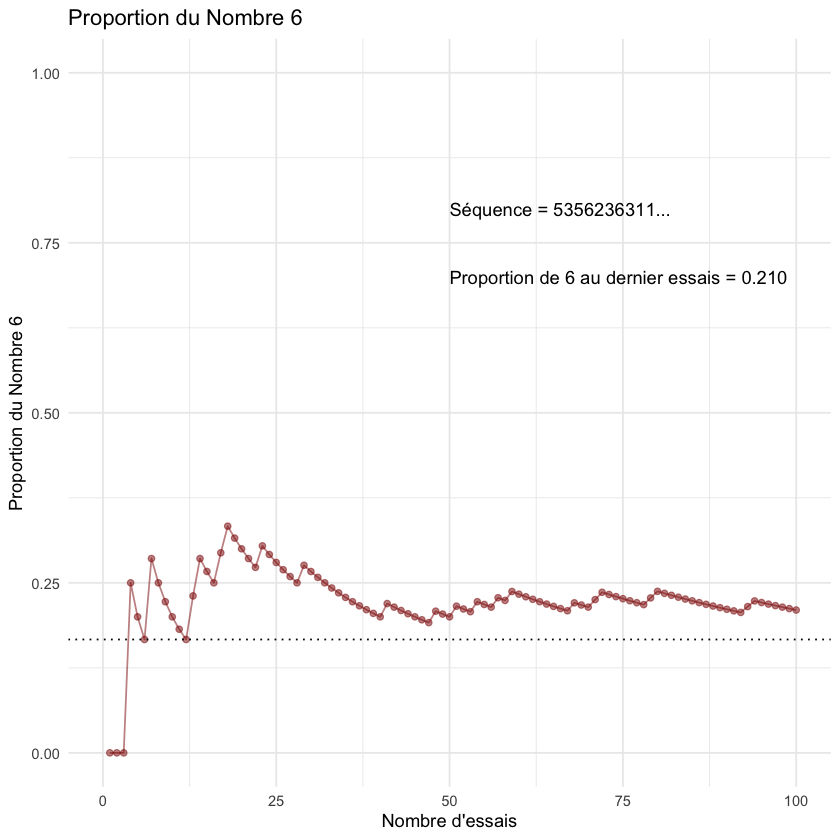

In [2]:
nsamples <- 100 # nombre de lancers

lancer <- sample(c("1", "2", "3", "4","5", "6"), nsamples, replace = TRUE) # générateur de nombres pseudo-aléatoires
prop_six <- cumsum(lancer == "6") / seq_along(lancer)  # calcul de la proportion de fois où le 6 apparaît


# graphique
ggplot(data.frame(x = 1:nsamples, y = prop_six), aes(x, y)) +
  geom_line(color = darkred, alpha = 0.5) +
  geom_point(color = darkred, alpha = 0.5) +
  geom_hline(yintercept = 0.1667, linetype = "dotted") +
  annotate("text", x = nsamples/2, y = 0.8, label = paste0("Séquence = ", paste(lancer[1:10], collapse = ""), "..."), hjust = 0) +
  annotate("text", x = nsamples/2, y = 0.7, label = sprintf("Proportion de 6 au dernier essais = %.3f", prop_six[nsamples]), hjust = 0) +
  ylim(0, 1) +
  xlim(0,nsamples) +
  labs(title = "Proportion du Nombre 6", x = "Nombre d'essais", y = "Proportion du Nombre 6") +
  theme_minimal()

On peut voir sur la figure que, même après un nombre important d'essais, la proportion de "6" est proche de 0.167 mais pas parfaitement égale à 0.167. Cet écart nous rappelle que même avec beaucoup d'essais, un échantillonnage aléatoire est nécessairement fini (et non pas infini), et qu'il n'y a aucune garantie que la fréquence relative d'un événement corresponde à la véritable probabilité sous-jacente de l'événement. C'est pourquoi nous disons que nous *approchons* la probabilité par la fréquence relative à long terme.


### Perspective basée sur la croyance incertaine

Dans la perspective basée sur la croyance incertaine, l'idée est de quantifier l'incertitude concernant notre croyance en un certain état du monde, étant donné certaines données. Si nous reprenons l'exemple du dé, nous pouvons imaginer que nous avons la croyance que le dé n'est pas biaisé, et que la probabilité d'obtenir le "6" est donc de 1/6 = 0.167. La probabilité d'obtenir le "6" peut être notée avec un paramètre labelisé  avec la lettre grecque theta : $\theta =  0.167$ . Le degré de croyance en ce paramètre est noté $p(\theta)$. Nous pouvons imaginer un scénario dans lequel nous croyons fortement que le dé n'est pas biaisé et que la probabilité d'apparition du "6" est 1/6 -- par exemple $p(\theta) = 0.99$, ou un autre scénario dans lequel nous croyons que le dé pourrait être biasé et donc nous avons plus d'incertitude -- par exemple $p(\theta) = 0.5$. 
Dans cette perspective, nous avons donc deux éléments : "la probabilité" et "le degré de croyance".

Ce qui distingue donc cette perspective est le fait de pouvoir exprimer le dégré d'incertitude par rapport à un certain paramètre ($\theta$). Cela peut être défini à travers des fonctions mathématiques qui définissent des courbes qui quantifient le niveau d'incertitude par rapport à un certain paramètre. Ces fonctions mathématiques définissent des distributions de $p(\theta)$, ou la *distribution a priori* de $\theta$. Dans notre exemple, cette distribution quantifie notre degré de croyance par rapport à la probabilité d'obtenir un "6" dans la lancer de dé, avant d'observer les données.

Concrètement, dans cette approche, le paramètre $\theta$ est aussi traité comme une variable aléatoire avec sa propre distribution de probabilité $p(\theta)$.



## Distributions de probabilité

Une distribution de probabilité est simplement une liste de toutes les issues possibles et de leurs probabilités correspondantes. Dans notre exemple du dé, cela est relativement simple : comme il y n'y a que 6 issues possibles (1, 2, 3, 4, 5 ou 6) qui sont équiprobables (1/6).
Nous pouvons déjà illustrer cette distribution de probabilité avec le graphique suivant :

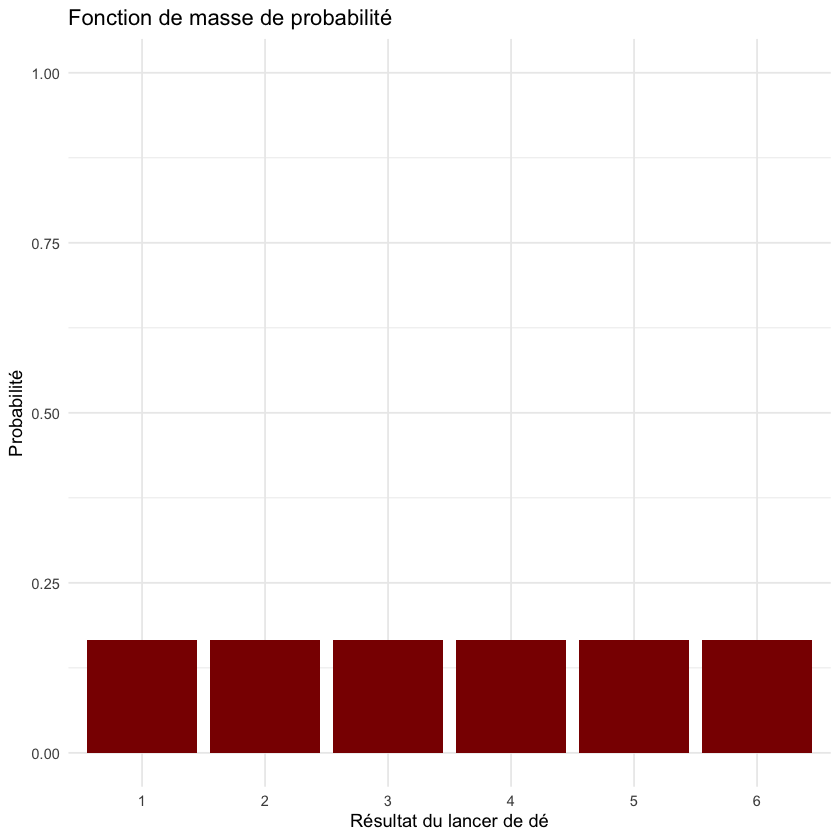

In [3]:
# Créer le dataset avec la liste de toutes les issues possibles et leurs probabilités correspondantes 
die_data <- data.frame(
  outcome     = 1:6,
  probability = rep(1/6, 6)
)

# Créer le graphique de masse de probabilité avec l'échelle de l'axe des y ajustée
ggplot(die_data, aes(x = factor(outcome), y = probability)) +
  geom_bar(stat = "identity", fill = darkred) +
  labs(title = "Fonction de masse de probabilité ",
       x = "Résultat du lancer de dé",
       y = "Probabilité") +
  ylim(0, 1) +
  theme_minimal()

Pour d'autre types de résultats possibles, comme dans la cas de variables aléatoires continues, les choses peuvent se compliquer un peu plus. Pour cela nous allons voir d'abord les distributions de probabilité discrètes et ensuite celles continues.

###  Probabilité discrète

Quand l'univers des possibilités est constitué d'issues discrètes, alors nous pouvons faire référence à la probabilité de chacune des issues possible de manière distincte comme dans notre exemple du dé.

L'exemple du dé est facile à suivre, mais clairement dans la recherche on s'intéresse à des univers de possibilités très différents. Par contre, dans la recherche il y a un grand nombre de cas où on s'intéresse à des possibilités discrètes, comme par exemple la survie à 5 ans après un certain type de traitement médical, ou encore la rechute après un certain type de traitement psychothérapeutique.

#### La loi de Bernoulli

Prenons donc ce dernier exemple : imaginons une clinique qui propose un nouveau traitement pour des personnes ayant des troubles liés à l'usage de substances. Pour mesurer l'efficacité de ce traitement, on mesure si la personne a fait une rechute dans les 6 mois après le traitement. Nous avons donc une variable aléatoire qui code les issues contenues dans l'univers qui n'admet que *deux issues possibles*, souvent codées 1 (succès) ou 0 (échec). Le but de la recherche est d'estimer la probabilité de rechute, que nous allons appeler $\theta$. Nous allons coder les deux issues possibles 1 (rechute) et 0 (pas de rechute).

Dans le cas où nous avons une seule personne ($n = 1$) qui a suivi le traitement dans cette clinique et nous essayons de prédire la probabilité de rechute pour cette personne, notre variable aléatoire va suivre la *loi de Bernoulli* : 

$$X \sim \textit{Be}(\theta) $$  

où $P(X = 1) = \theta$ \
et $P(X = 0) = 1 - \theta$ 

#### La loi binomiale

Hors, si nous devons faire cette prédiction pour plus d'une personne (disons par exemple que 10 personnes ont suivi le traitment dans cette clinique), pour chacune de ces personnes nous allons coder 1 (s'il y a eu une rechute) ou 0 (s'il n'y a pas eu de rechute). Nous avons donc 10 observations indépendantes ($N= 10$). Nous pouvons compter le nombre de rechutes en faisant la somme du nombre de personnes parmi les 10 qui ont eu une rechute. Ici, on est dans le cas d'une variable aléatoire qui somme $N$ expériences de Bernoulli de paramètre $\theta$. Dans ce cas, notre variable aléatoire suit la distribution de la *loi binomiale* :

$$ X \sim \text{Binomial}(N, \theta) $$

Pour mieux comprendre cette distribution, nous imaginons un exemple dans lequel nous avons 20 cliniques différentes qui ont chacune traité 10 personnes avec la même thérapie. Nous allons simuler ce scénario avec `R`, en utilisant la fonction `rbinom` pour créer les données simulées. Dans cette fonction, `n` se réfère au nombre d'échantillons (ou nombre d'observations). Dans notre cas, le nombre d'échantillons correspond au nombre de cliniques. `size` se réfère à la taille de l'échantillon, donc au nombre de personne par clinique qui ont suivi le traitement. `prob` se réfère à la probabilité qu'il y ait une rechute, c'est-à-dire notre paramètre $\theta$.

Voici la commande `R` qui calcule combien de personnes ayant suivi le traitment ont eu une rechute, si la probabilité est de 0.5 :

In [4]:
rbinom(n = 20, size = 10, prob = 0.5)

[1] 8 5 5 7 5 4 7 5 6 5 6 5 6 4 6 4 3 8 5 8

Chaque valeur indique le nombre de personnes (sur 10) qui ont eu une rechute dans chacune des 20 cliniques sous une probabilité de rechute de 0.5. 
Autrement dit, c'est le nombre de rechutes pour chacune de 20 observations simulées générées par une variable aléatoire discrète $X$ avec une distribution de probabilité $p(x|\theta)$ appelée distribution binomiale.

#### Probability Mass Function

Pour une variable aléatoire discrète, cette distribution s'appelle fonction de masse de probabilité ou **Probability Mass Function** (*PMF*).

Comme nous l'avons vu dans l'exemple du dé, cette fonction définit la probabilité de chacune des issues possibles. Dans le cas de notre traitement il y a 10 patients, donc les possibilités sont au nombre de 11 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ou 10 personnes qui ont une rechute).

Nous pouvons plus concrètement créer le graphique de cette fonction de probabilité de masse comme suit. Vous pouvez essayer de changer la valeur de `theta` pour voir les effets que cela a sur la distribution :



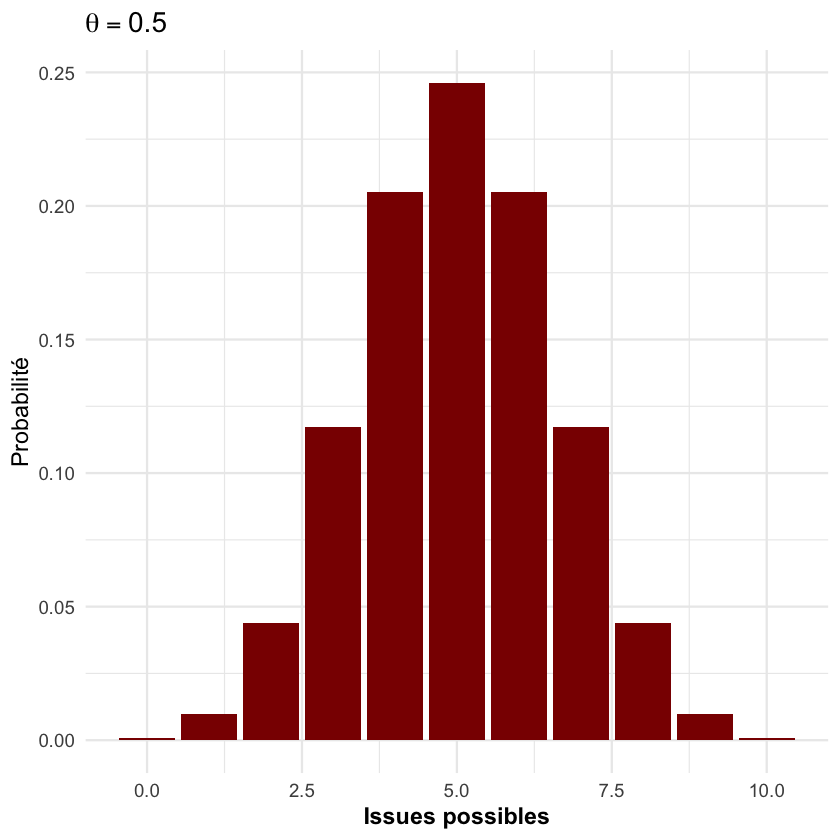

In [ ]:
theta <- 0.5

data <- data.frame(x = 0:10, y = dbinom(0:10, size = 10, prob = theta))

ggplot(data, aes(x, y)) +
  geom_bar(stat = "identity", fill = darkred) +
  labs(x = "Issues possibles", y = "Probabilité") +
  theme_minimal(base_size = 14) +
  theme(
    axis.title.x = element_text(face = "bold"),
    plot.title = element_text(face = "bold")
  ) +
  ggtitle(bquote(theta == bold(.(theta))))

La formule de la loi binomiale qui calcule les probabilités de rechute pour chaque issue possible est formalisée comme suit : 

$$ P(X = k \mid n, \theta) = \binom{n}{k} \theta^k (1 - \theta)^{n - k} $$



- $ \binom{n}{k} = \frac{n!}{k!(n-k)!} $ est le coefficient binomial. Il se lit $k$ parmi $n$ et calcule le nombre de façons d'obtenir $k$. Avec `R` nous pouvons le calculer facilement avec la function `choose(n,k)`
- $ \theta $ est la probabilité de succès lors d'un essai
- $ n $ est le nombre total d'essais 
- $ k $ est le nombre de succès obtenus

La loi binomiale permet de calculer la probabilité que la variable aléatoire prenne une certaine valeur. Cette information est déjà présente dans la figure illustrant la distribution des probabilités ci-dessus, mais la formule permet d'obtenir les valeurs exactes sans devoir les lire sur le graphique. Par exemple, nous pouvons calculer la probabilité que 10 personnes sur 10 aient une rechute à 6 mois dans un traitement pour lequel $\theta = 0.5$.

Pour ce faire, nous pouvons faire appel à la fonction R `dbinom` de la manière suivante :

In [6]:
dbinom(x = 10, size = 10, prob = 0.5)

[1] 0.0009765625

Nous pouvons aussi utiliser la fonction `dbinom` pour calculer cette probabilité pour des traitements qui ont des paramètres différents. Par example, lorsque $\theta$ est égal à 0.3 ou 0.7, on peut calculer la probabilité que 10 personnes sur 10 aient une rechute dans les 6 mois en remplaçant 0.5 dans l'expression ci-dessus par chacune de ces probabilités.  

On peut simplement le faire en fournissant un vecteur de probabilités à la fonction `dbinom` comme suit :

In [7]:
dbinom(x = 10, size = 10, prob = c(0.3, 0.7))

[1] 0.0000059049 0.0282475249

Il est important de retenir que le calcul de la probabilité de la réalisation d'une certaine issue est possible uniquement dans le cas d'une variable aléatoire discrète (et non pas pour les variables continues comme nous le verrons dans la section suivante).

#### La probabilité cumulée

Une autre chose très utile que nous pouvons faire avec la distribution binomiale est le calcul de la probabilité cumulative d'obtenir au moins $k$ succès. Pour rendre cela plus concret, nous pouvons imaginer l'exemple d'un traitement assisté de fertilité. Ces traitements ont des coût économiques et psychologiques élevés, avec des probabilités de succès relativement basses, disons par exemple $\\theta = 0.2$. Comme le taux de réussite pour un cycle de traitement est relativement bas, ces traitements sont proposés par plusieurs cycles, par exemple $n = 4$. Cela est basé sur le principe que la probabilité cumulative d'obtenir au moins un succès augmente avec la répétition du traitement.

Concrètement, la probabilité cumulative est la somme de la probabilité de chaque issue, jusqu'à un certain seuil d'intérêt. Dans notre exemple, nous voulons sommer $P(X = 1) + P(X = 2) + P(X = 3) + P(X = 4)$ :

In [ ]:
dbinom(1, size = 4, prob = 0.2) +
dbinom(2, size = 4, prob = 0.2) +
dbinom(3, size = 4, prob = 0.2) +
dbinom(4, size = 4, prob = 0.2)

[1] 0.5904

Cela est formalisé par la formule suivante :

$$ \sum_{k=0}^{n} \binom{n}{k} \theta^k (1-\theta)^{n-k} $$ 


dans notre exemple, $k=1$ et $n = 4$.

Avec `R` nous pouvons utiliser la fonction `pbinom` qui calcule la probabilité d'avoir un nombre de succès supérieur (`lower.tail = FALSE`) ou inférieur (`lower.tails = TRUE`) à une certaine valeur seuil. Dans notre exemple, nous voulons calculer la probabilité d'avoir au moins un succès parmi les 4 cycles de traitement.

Nous l'utilisons donc comme suit :

In [8]:
pbinom(0, size = 4, prob = 0.2, lower.tail = FALSE)

[1] 0.5904

Concrètement, nous faisons la somme des probabilités de toutes les issues différentes de 0. Nous pouvons le visualiser comme la somme des barres rouges dans le graphique ci-dessous :

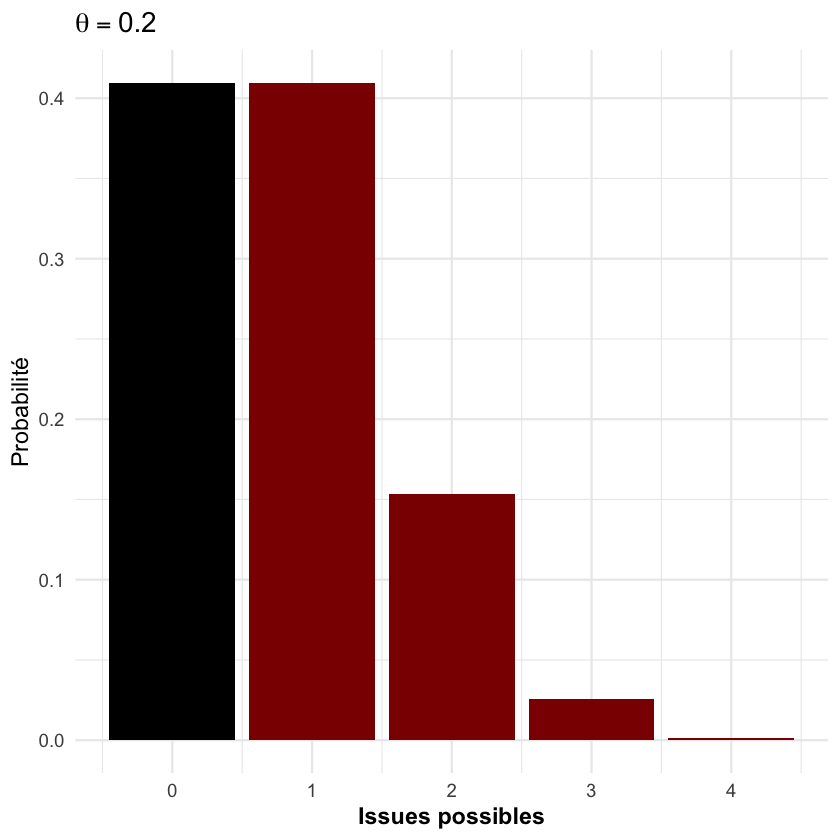

In [9]:
theta <- 0.2

data <- data.frame(x = 0:4, y = dbinom(0:4, size = 4, prob = theta))

colors <- c("black", rep(darkred, 4))

ggplot(data, aes(x, y)) +
  geom_bar(stat = "identity", fill = colors) +
  labs(x = "Issues possibles", y = "Probabilité") +
  theme_minimal(base_size = 14) +
  theme(
    axis.title.x = element_text(face = "bold"),
    plot.title = element_text(face = "bold")
  ) +
  ggtitle(bquote(theta == bold(.(theta))))

La fonction de répartition cumulative ou **cumulative distribution function** (*CDF*) peut être tracée en calculant les probabilités cumulées pour toute valeur $k$ ou inférieure à $k$, où $k$ varie de 0 à 10 dans notre exemple. La CDF est illustrée ci-dessous :

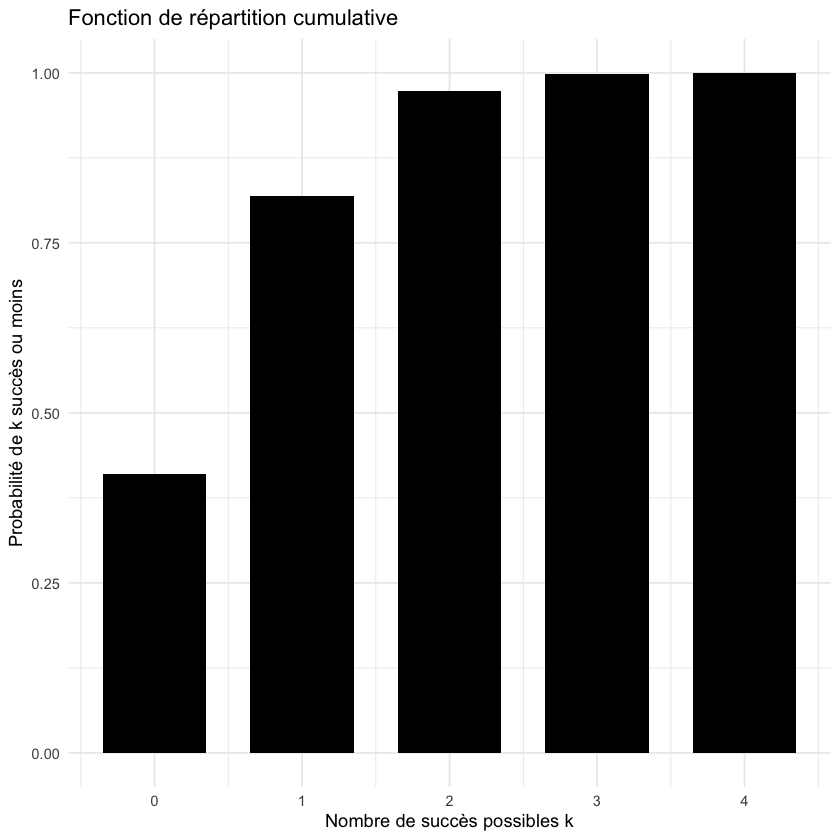

In [ ]:
n <- 4 # Nombre d'essais
theta <- 0.2 # Probabilité de succès

# Créer un data frame avec les probabilités cumulées
k_values <- 0:n
cdf_values <- pbinom(k_values, size = n, prob = theta)
data <- data.frame(k = k_values, cdf = cdf_values)

# Tracer avec ggplot2
ggplot(data, aes(x = k, y = cdf)) +
  geom_bar(stat = "identity", fill = "black", width = 0.7) +  # Barres noires
  labs(title = "Fonction de répartition cumulative",
       x = "Nombre de succès possibles k",
       y = "Probabilité de k succès ou moins") +
  theme_minimal()

Dans notre exemple de traitement assisté de fertilité, cette représentation ne nous donne pas d'informations très utiles car chaque instance inclut $k = 0$.

Ce type de représentation graphique peut par contre être intéressante pour l'exemple précédant dans lequel l'on prédisait la probabilité de rechute à 6 mois. La CDF pour l'exemple des rechutes à 6 mois est représentée ci-dessous. Dans ce graphique, nous pouvons voir la probabilité que $k$ personnes ou moins aient une rechute à 6 mois. Vous pouvez changer le paramètre $\theta$ et observer les effets que cela a sur la fonction de répartition cumulative.

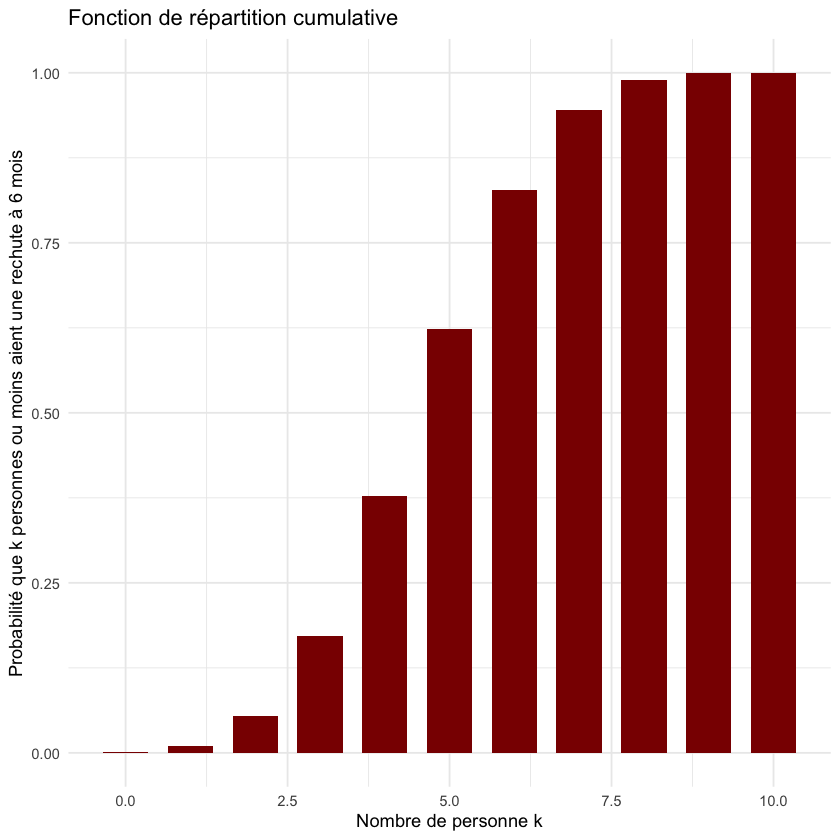

In [ ]:
n <- 10 # Nombre d'essais
theta <- 0.5 # Probabilité de rechute du traitement

# Créer un data frame avec les probabilités cumulées
k_values <- 0:n
cdf_values <- pbinom(k_values, size = n, prob = theta)
data <- data.frame(k = k_values, cdf = cdf_values)

# Tracer avec ggplot2
ggplot(data, aes(x = k, y = cdf)) +
  geom_bar(stat = "identity", fill = darkred, width = 0.7) +  # Barres noires
  labs(title = "Fonction de répartition cumulative",
       x = "Nombre de personne k",
       y = "Probabilité que k personnes ou moins aient une rechute à 6 mois") +
  theme_minimal()

Vous pouvez voir que, plus le paramètre $\theta$ diminue, plus la probabilité que moins de 0, 1 ou 2 personnes aient une rechute à 6 mois augmente. En d'autres mots, plus la probabilité de rechute diminue, plus la probabilité que peu de personnes aient une rechute augmente.

###  Probabilité continue

Une variable aléatoire est dite continue lorsqu’elle peut prendre toutes les valeurs dans un support donné. Un exemple d'une variable aléatoire continue est la mesure de la taille en cm, ou encore la mesure du temps pris pour compléter une tâche en secondes ou millisecondes.

Si vous réfléchissez attentivement à un espace de résultats dans le cadre d'une variable aléatoire continue, vous pouvez réaliser rapidement qu’il devient problématique de parler de la probabilité d’une valeur spécifique sur une échelle continue. Par exemple, la probabilité qu’une personne choisie au hasard ait une taille en cm exactement égale à 168.854 est essentiellement nulle. De la même manière, la probabilité qu'une personne mette exactement 20 min 37 s et 454 ms pour accomplir une tâche expérimentale est essentiellement nulle. De manière générale, cela est vrai pour toute valeur exacte à laquelle vous pouvez penser. 

C'est pour cela que quand on parle de distributions continues, on utilise le concept de *densité*. Concrètement, dans le cas d'une distribution continue on ne s'intéresse pas au calcul de la probabilité d'une valeur précise de la variable aléatoire, mais on s'intéresse plutôt à la probabilité que la variable aléatoire ait une valeur contenue dans un certain intervalle $[a,b]$. Par exemple, on peut calculer la probabilité que la taille d'une personne choisie au hasard soit comprise entre 160 et 170 cm, ou encore la probabilité qu'une personne mette entre 20 et 25 minutes pour accomplir une tâche expérimentale. Ce calcul se fait à l'aide d'une fonction de densité, qui correspond à l'aire sous la courbe dans la distribution des probabilités de la variable continue.

Pour concrétiser cela, nous pouvons prendre un exemple d'une distribution continue très familière : la distribution normale. Cette distribution a deux *paramètres* :

* $\mu$ (mu) : la moyenne de la distribution
* $\sigma$ (sigma) : l'écart-type de la distribution

La valeur de $\mu$ détermine où se situe le centre de la courbe en cloche sur l'axe des abscisses ; on l'appelle donc un **paramètre de position**.  

La valeur de $\sigma$ détermine la largeur de la cloche ; on l'appelle donc un **paramètre d'échelle**.  

Dans le chapitre *motivations*, nous avons vu un modèle (la loi normale) avec deux paramètres qui agissent comme des **boutons de réglage** nous permettant de modifier la position et l'échelle de la distribution de sorte à ce que la distribution s'adapte le mieux aux données observées. Dans le chapitre *motivations*, nous avons vu le modèle GLM avec les paramètres beta 1, beta 0, et la variance des résidus. Le principe est le même ici ; la formule mathématique de notre modèle, c'est-à-dire la densité de probabilité normale, est donnée par :

$$
p(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right).
$$



où :  
- $ \frac{1}{\sigma \sqrt{2\pi}}$ représente une constante de normalisation 
- $ \exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right)$ représente le "kernel" de la distribution normale


Dans le cas de notre exemple de la taille en cm, une distribution de densité de probabilité normale peut être illustrée comme suit :

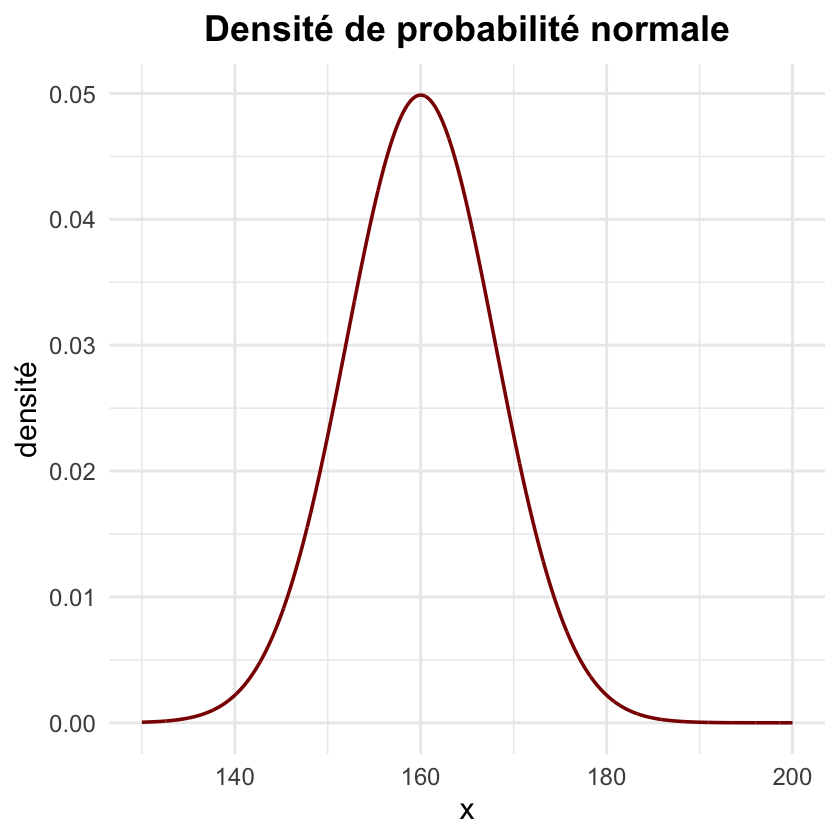

In [ ]:
# Paramètres de la distribution
mu <- 160 # Moyenne
sigma <- 8 # Écart-type

# Simuler des données pour l'illustration
dx <- 0.02
x_vals <- seq(130, 200, by = dx)
p_vals <- dnorm(x_vals, mean = mu, sd = sigma)

# Mettre les données dans une database
df <- data.frame(x = x_vals, p = p_vals)

# Faire le graphique
ggplot(df, aes(x, p)) +
  geom_line(color = darkred, linewidth = 1) +  # Courbe de densité
  labs(title = "Densité de probabilité normale",
       x = "x",
       y = "densité") +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

Il est important de bien faire attention au fait que, dans ce graphique, ce qui est représenté sur l’axe *y* correspond à la **densité** de probabilité, et non à la probabilité elle-même. Dans ce type de graphique, la probabilité se lit comme l’aire sous la courbe. C’est donc l’ensemble de l’aire sous la courbe qui est égal à 1.

Une fois que nous avons la loi de distribution de la variable aléatoire continue, $f(x)$, nous pouvons calculer la probabilité dans un intervalle d'intérêt de la variable aléatoire à l'aide de la formule suivante :

$$
P(X \in [a,b]) = \int_{a}^{b} dx \,f(x) 
$$

où :  
- $ P(X \in [a,b]) $ représente la probabilité que la variable aléatoire $ X $ prenne une valeur dans l'intervalle $ [a,b] $.  
- $ \int_{a}^{b} f(x) \,dx $ est l'intégrale de la fonction de densité $f(x)$ entre $a$ et $b$, ce qui correspond à l'aire sous la courbe de $f(x)$ sur cet intervalle.  
- $f(x)$ est la fonction de densité de probabilité (PDF) associée à $X$ qui décrit comment les valeurs de $X$ sont distribuées.  
- $a$ et $b$ sont les bornes de l'intervalle considéré.  


Nous pouvons le représenter visuellement comme suit :

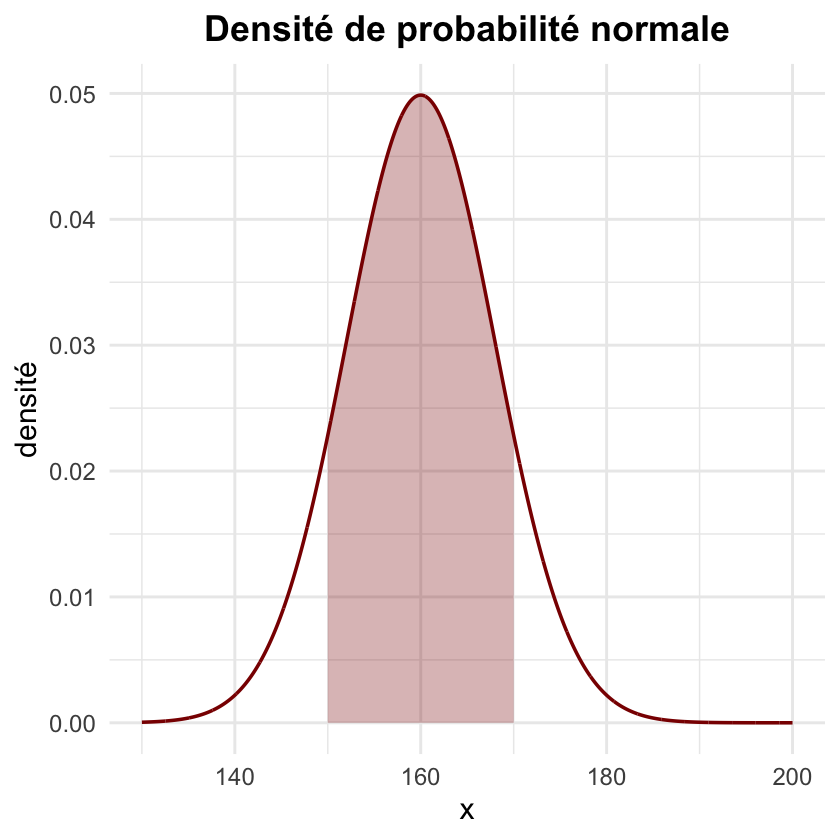

In [21]:
# Paramètres
mu <- 160 # Moyenne
sigma <- 8 # Écart-type

# Générer des données pour la distribution normale
dx <- 0.02
x_vals <- seq(130, 200, by = dx)
p_vals <- dnorm(x_vals, mean = mu, sd = sigma)

# Créer un data frame
df <- data.frame(x = x_vals, p = p_vals)

# Définir la région à intégrer entre 150 et 170
df_shaded <- subset(df, x >= 150 & x <= 170)

# Tracer le graphique
ggplot(df, aes(x, p)) +
  geom_line(color = darkred, linewidth = 1) +  # Courbe de densité
  geom_ribbon(data = df_shaded, aes(ymin = 0, ymax = p), fill = darkred, alpha = 0.3) +  # Aire sous la courbe
  labs(title = "Densité de probabilité normale",
       x = "x",
       y = "densité") +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

## La valeur espérée et la variance d'une distribution de probabilité

### La valeur espérée

Pour décrire la tendance centrale d'une distribution de probabilité, on utilise le concept de valeur espérée (*expected value*). La valeur espérée est la valeur la plus probable de notre variable aléatoire. On peut la comprendre comme une moyenne pondérée. Typiquement, on utilise la moyenne pour décrire un échantillon de données recoltées. Dans la distribution de probabilité, la valeur espérée ne correspond pas à la moyenne d'un échantillon, mais à la moyenne sur le long terme. Pour cela, on fait une pondération des issues possibles de la variable aléatoire avec la probabilité de chacune de ces issues.

Pour illustrer ce concept, nous allons faire appel encore une fois à l'exemple du lancer de dé. Nous somme dans le cas d'une variable aléatoire discrète dans laquelle il y a 6 issues possibles ($1, 2, 3, 4, 5, 6$) qui sont toutes equiprobables ($1/6$). Dans ce cas, la valeur espérée se calcule selon :

$$
E[X] = \sum_{i}  p(x_i) \cdot x_i
$$

Dans notre exemple, cela correspond à :

$$
1/6 \cdot 1 + 1/6 \cdot 2 + 1/6 \cdot 3 + 1/6 \cdot 4 + 1/6 \cdot 5 + 1/6 \cdot 6 = 3.5
$$


Dans le cas d'une distribution d'une variable aléatoire continue, comme dans l'exemple de la distribution de probabilité des tailles en cm, le principe est exactement le même. La difference réside dans le fait que, vu qu'il s'agit d'une distribution continue et que les intervalles sont par conséquent infinitésimales, nous devons faire appel à une intégrale et non à une somme. L'opération reste néanmoins exactement la même :

$$
E[x] = \int dx  \, p(x) \cdot x
$$

Dans notre exemple, les tailles sont distribuées selon une loi normale. Dans ce cas, le calcul de l'intégrale permettant de déterminer la valeur espérée correspond à la moyenne ($\mu$), c'est-à-dire 160 cm.

### La variance

La variance d'une distribution de probabilité, comme celle de la loi normale, se calcule selon le même principe général que dans les autres modèles vus précédemment : il s'agit de mesurer l'écart moyen (au carré) entre les valeurs possibles de la variable et la valeur centrale du modèle, c'est-à-dire sa valeur espérée $(x-E[x])^2$.
Plus précisément, dans le cas d'une loi normale d'une distribution de probabilité, les "données" ne sont pas des observations ponctuelles, mais toutes les valeurs que peut prendre la variable aléatoire continue, pondérées par leur probabilité exprimée. Il faut donc faire appel au calcul de l'intégrale pour calculer la variance comme il suit :

$$
var_x = \int dx  \, p(x) \cdot (x-E[x])^2
$$

### Visualisation des changements de paramètres sur la forme de la distribution de la normale

Dans l'exemple que nous avons vu, le modèle de la loi normale définit la forme de la fonction de densité de probabilité, mais cette "forme" peut varier selon le paramètre de position ($\mu$, ou moyenne) et le paramètre d’échelle ($\sigma$, ou écart-type). Dans le code ci-dessous, vous pouvez essayer d’entrer différentes valeurs de $\mu$ et observer l’impact que cela a sur la forme de la distribution.

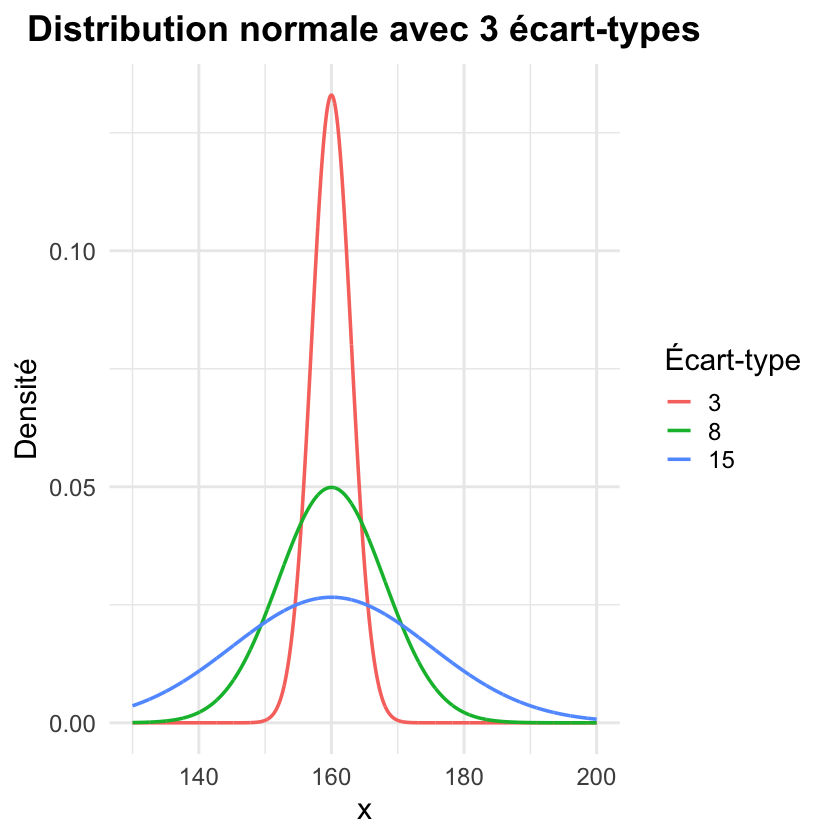

In [22]:
# Paramètres de la distribution
mu <- 160 # Moyenne
sigma_values <- c(3, 8, 15) # Différents écarts-types

# Simuler les distributions
dx <- 0.02
x_vals <- seq(130, 200, by = dx)

# Créer une data frame pour les trois distributions
df <- data.frame()
for (sigma in sigma_values) {
  df <- rbind(df, data.frame(x = x_vals,
                             p = dnorm(x_vals, mean = mu, sd = sigma),
                             sigma = factor(sigma)))
}

# Faire le graphique avec trois courbes
ggplot(df, aes(x, p, color = sigma)) +
  geom_line(linewidth = 1) +  # Courbes de densité
  labs(title = "Distribution normale avec 3 écart-types",
       x = "x",
       y = "Densité",
       color = "Écart-type") +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

## L'intervalle de densité maximale

En statistiques bayésiennes, on utilise souvent les distribution de probabilité pour calculer l'intervalle de densité maximale ou *highest density interval (HDI)* pour résumer l'intervalle de valeurs les plus crédibles. Nous verrons plus en detail ce concept dans le chapitre dédié à la distribution a posteriori. Pour le moment, nous pouvons déjà voir que cela correspond à l'intervalle de valeurs de la variable continue pour leuqel l'aire sous la courbe de la distribution de probabilité correspond à 0.95.

Il est important de noter que l’intervalle de densité maximale (HDI) n'est pas limité aux distributions symétriques comme la loi normale. Il peut également être calculé pour des distributions asymétriques, comme les lois gamma ou beta, qui sont couramment rencontrées en statistique bayésienne. Dans ces cas, le HDI s’ajuste à la forme réelle de la distribution : l’intervalle reste centré sur les valeurs les plus probables, mais il peut être décalé et avoir des longueurs différentes de part et d’autre du mode. Cela en fait un outil particulièrement adapté pour résumer l’incertitude, même lorsque la distribution a posteriori est fortement asymétrique.

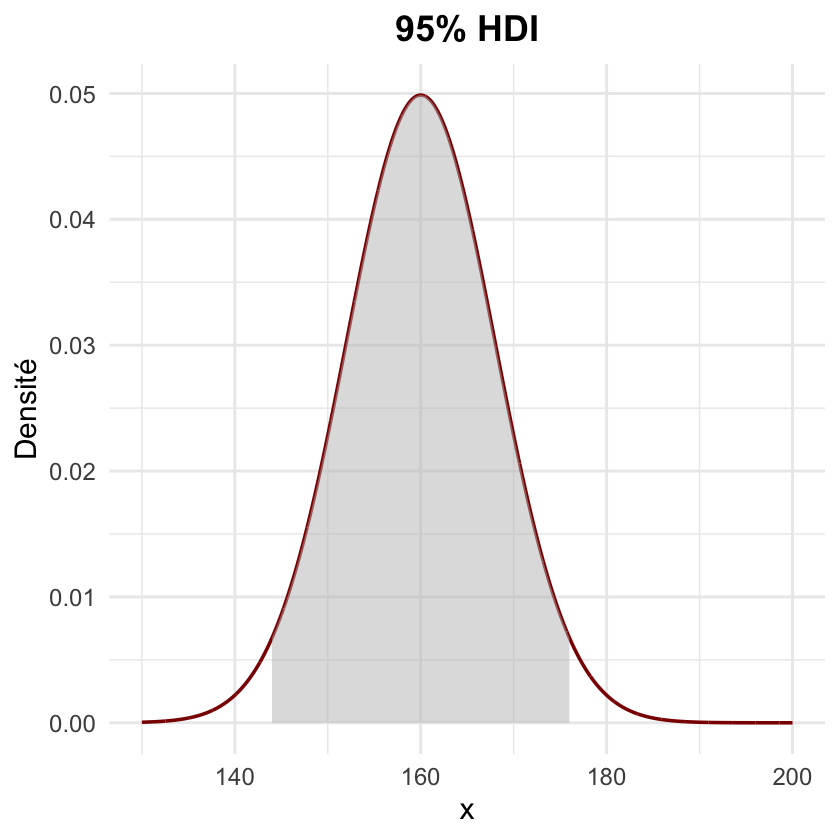

In [ ]:
mu <- 160 # Moyenne
sigma <- 8 # Écart-type

# Générer des données pour la distribution normale
dx <- 0.02
x_vals <- seq(130, 200, by = dx)
p_vals <- dnorm(x_vals, mean = mu, sd = sigma)

# Créer un data frame
df <- data.frame(x = x_vals, p = p_vals)

# Définir l'intervalle HDI à 95% comme [mu - 2*sigma, mu + 2*sigma]
# Approximation valide seulement pour une loi normale
hdi_min <- mu - 2 * sigma
hdi_max <- mu + 2 * sigma

# Sélectionner la région HDI dans le dataframe
df_hdi <- subset(df, x >= hdi_min & x <= hdi_max)

# Tracer le graphique
ggplot(df, aes(x, p)) +
  geom_line(color = darkred, linewidth = 1) + # Courbe de densité
  geom_ribbon(
    data = df_hdi,
    aes(ymin = 0, ymax = p),
    fill = "gray", alpha = 0.5
  ) + # Zone HDI en gris
  labs(title = "95% HDI",
       x = "x",
       y = "Densité") +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

## La fonction de répartition cumulative

Comme dans le cas de variables aléatoires discrètes, nous allons réfléchir en termes de probabilité cumulée dans le cas de variables aléatoires continues.

Tout comme pour une variable aléatoire discrète, la fonction de répartition cumulative (*cumulative distribution function* ou CDF) d'une variable aléatoire continue donne la probabilité que la variable ait une valeur inférieure ou égale à $x$. En d'autres termes, elle représente l'aire sous la courbe de la densité de probabilité de la variable aléatoire jusqu'à une certaine valeur $x$. La CDF est donc croissante et varie de 0 à 1 à mesure que $x$ augmente.

Un point clé dans l'étude de la CDF est le point d'inflexion, qui correspond à la valeur de $x$ pour laquelle la courbe de la CDF change de concavité, c'est-à-dire où la pente de la courbe passe de croissante à décroissante (ou inversement). Ce point peut fournir des informations importantes sur la distribution, et correspond au pic dans la distribution PDF utilisée ci-dessus. Vous pouvez observer que, dans notre exemple, le point d'inflexion dans la CDF correspond à 160 cm.

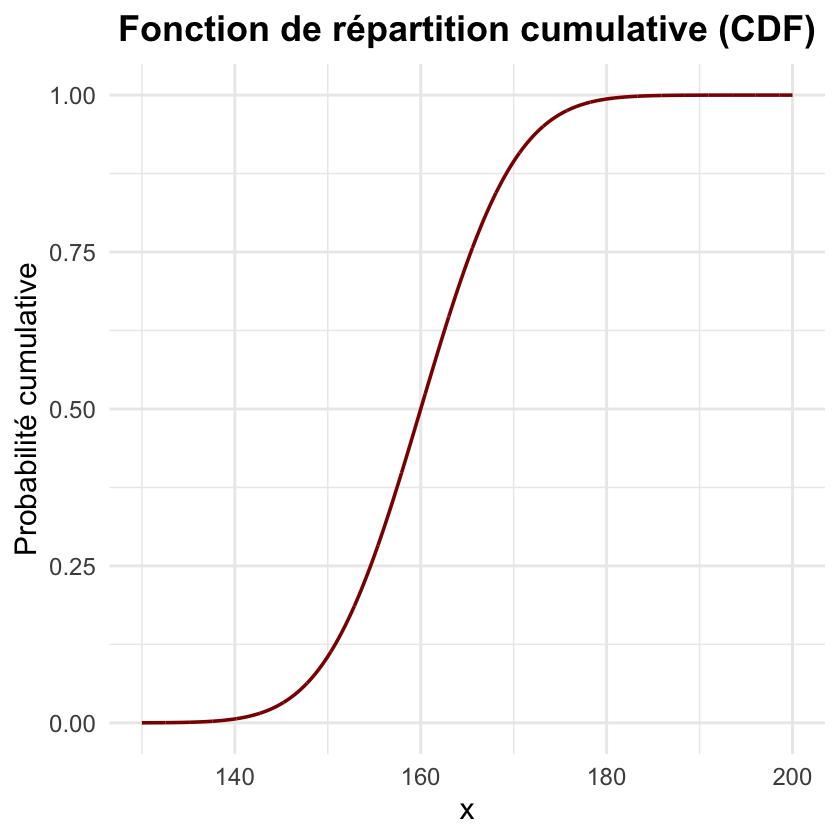

In [26]:
# Paramètres de la distribution
mu <- 160 # Moyenne
sigma <- 8 # Écart-type

# Simuler des valeurs pour la CDF
dx <- 0.02
x_vals <- seq(130, 200, by = dx)
p_vals <- pnorm(x_vals, mean = mu, sd = sigma) # CDF

# Mettre les données dans une database
df <- data.frame(x = x_vals, p = p_vals)

# Faire le graphique
ggplot(df, aes(x, p)) +
  geom_line(color = "darkred", linewidth = 1) +  # courbe CDF
  labs(title = "Fonction de répartition cumulative (CDF)",
       x = "x",
       y = "Probabilité cumulative") +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

## La distribution de Cauchy

Jusqu'ici, nous n'avons vu que la loi normale pour les distributions de probabilités continues. Comme nous le verrons dans le chapitre sur les priors, beaucoup d'autres existent. L'une d'entre elles est la distribution (ou loi) de Cauchy. Contrairement à la plupart des distributions usuelles, la distribution de Cauchy n'a ni espérance mathématique définie, ni variance définie. Cela est dû au fait que les intégrales permettant de calculer ces moments ne convergent pas. Intuitivement, cela signifie que la "moyenne" d'un grand échantillon tiré d'une distribution de Cauchy ne se stabilise pas comme dans le cas d'une loi normale - elle peut varier considérablement à cause de la probabilité non négligeable d'observer des valeurs extrêmes. À cause de ces propriétés particulières, la distribution de Cauchy est parfois définie comme une distribution "pathologique". 

Malgré ces caractéristiques, la densité de probabilité de la loi de Cauchy est très utilisée dans les applications des statistiques bayésiennes pour deux raisons principales :

1. Elle a une forme très similaire à celle de la loi normale, ce qui la rend intuitive à manipuler. 

2. Ses queues épaisses qui sont la cause des ses propriétés indéfinies sont en même temps très précieuses : elles permettent de répartir la probabilité de manière plus prudente, en attribuant une masse plus importante aux valeurs extrêmes par rapport à la normale. Cela s'avère particulièrement utile dans les situations où des valeurs aberrantes ou extrêmes sont plus fréquentes, car elle les intègre naturellement dans le modèle sans les exclure comme de simples anomalies. C’est d’ailleurs la raison pour laquelle elle est souvent utilisée comme loi a priori par défaut dans certains outils comme la fonction `anovaBF` du package `BayesFactor` sur `R`. 

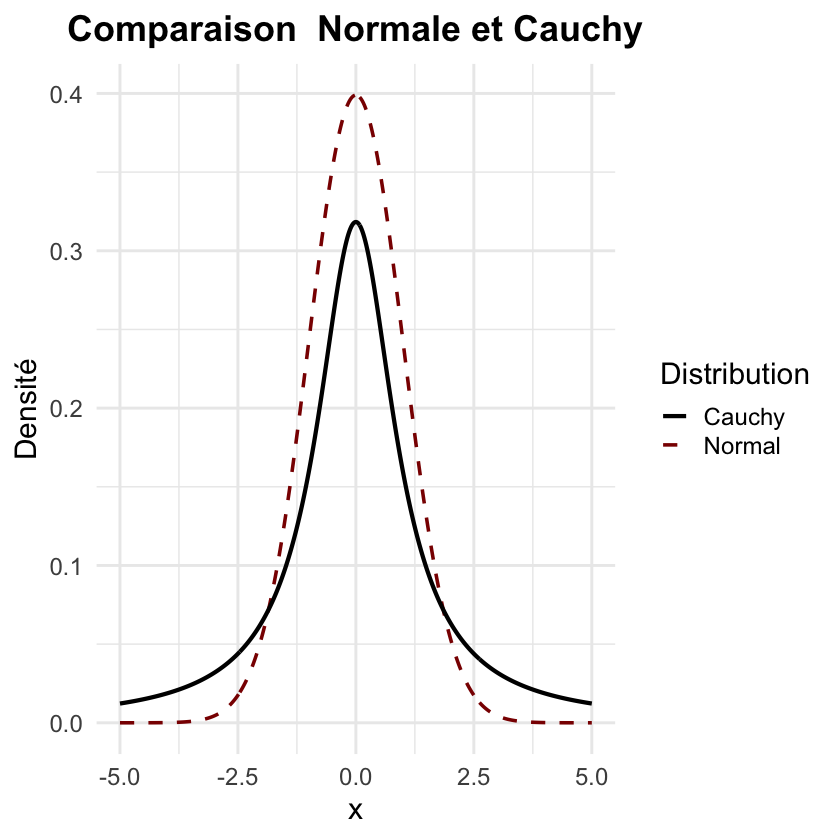

In [27]:
# Définir les valeurs x
x_vals <- seq(-5, 5, by = 0.02)

# Calculer les densités pour Normale et Cauchy
p_normal <- dnorm(x_vals, mean = 0, sd = 1)  # Loi Normale
p_cauchy <- dcauchy(x_vals, location = 0, scale = 1)  # Loi de Cauchy

# Créer un data frame
df <- data.frame(x = x_vals, Normal = p_normal, Cauchy = p_cauchy)

# Tracer le graphique
ggplot(df, aes(x)) +
  geom_line(aes(y = Normal, color = "Normal"), linewidth = 1, linetype = "dashed") +
  geom_line(aes(y = Cauchy, color = "Cauchy"), linewidth = 1.2) +
  scale_color_manual(values = c("Normal" = darkred, "Cauchy" = "black")) +
  labs(title = "Comparaison  Normale et Cauchy",
       x = "x",
       y = "Densité",
       color = "Distribution") +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

### Visualisation des changements de paramètres sur la forme de la distribution de Cauchy

Comme la loi normale, la loi de Cauchy a deux paramètres :
* un paramètre de localisation $x_0$
* un paramètre d'échelle $\gamma$

Nous pouvons voir les effets des changements de ces paramètres sur la forme de la distribution ci-dessous.

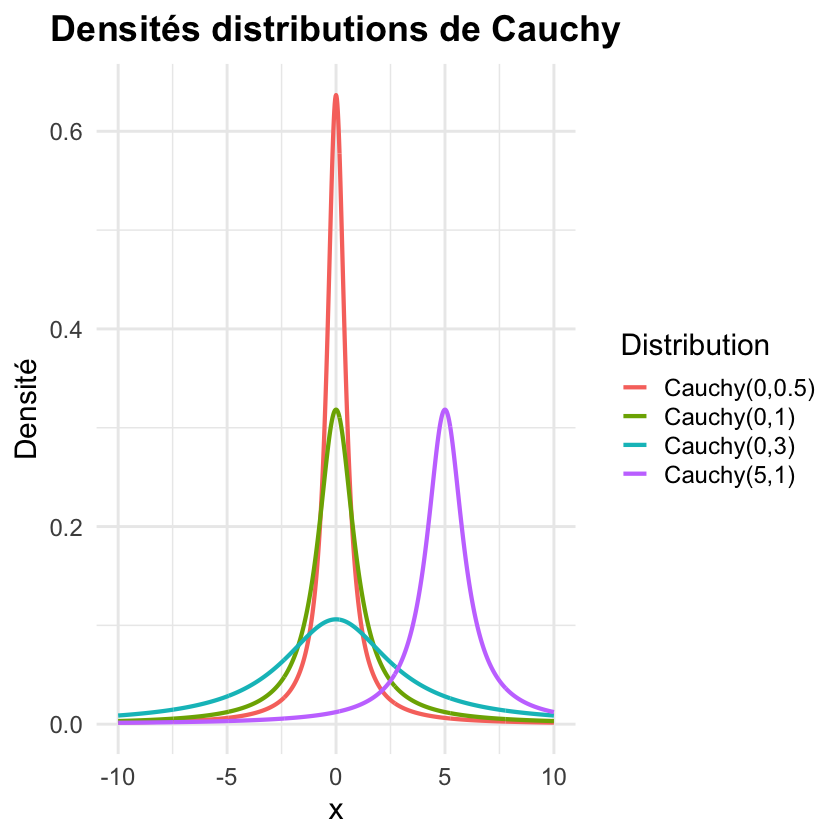

In [ ]:
# Définir les valeurs de x
x_vals <- seq(-10, 10, by = 0.02)

# Calculer les densités pour différentes distributions de Cauchy
p_cauchy1 <- dcauchy(x_vals, location = 0, scale = 1) # Vert (Cauchy(0,1))
p_cauchy2 <- dcauchy(x_vals, location = 5, scale = 1) # Bleu (Cauchy(5,1))
p_cauchy3 <- dcauchy(x_vals, location = 0, scale = 0.5) # Rouge (Cauchy(0,0.5))
p_cauchy4 <- dcauchy(x_vals, location = 0, scale = 3) # Orange (Cauchy(0,3))

# Créer un data frame
df <- data.frame(
  x = rep(x_vals, 4),
  y = c(p_cauchy1, p_cauchy2, p_cauchy3, p_cauchy4),
  Distribution = rep(c("Cauchy(0,1)", "Cauchy(5,1)", "Cauchy(0,0.5)", "Cauchy(0,3)"), each = length(x_vals))
)

# Tracer le graphique
ggplot(df, aes(x, y, color = Distribution)) +
  geom_line(linewidth = 1.2) +
  labs(title = "Densités distributions de Cauchy",
       x = "x",
       y = "Densité",
       color = "Distribution") +
  xlim(-10, 10) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

En théorie des probabilités, la représentation graphique de la loi de Cauchy se fait par la *versiera* de Maria Gaetana Agnesi.  Bien que cette courbe ait été introduite à l’origine dans un autre contexte — la géométrie analytique — sa forme mathématique exacte correspond à la fonction de densité de la distribution de Cauchy standard. Bien que Maria Gaetana Agnesi n’ait pas elle-même travaillé dans le domaine de la probabilité, la fonction qu’elle a étudié est devenue une pièce centrale dans la modélisation statistique moderne, surtout dans les domaines où l’on souhaite éviter d’imposer une certitude excessive sur les valeurs extrêmes.